In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [20]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize images to [0, 1] and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Add noise
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

X_train_noisy = add_noise(X_train)
X_test_noisy = add_noise(X_test)


In [24]:
def build_autoencoder():
    
    input_img = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Bottleneck
    encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
    
    # Decoder
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

autoencoder = build_autoencoder()


In [25]:
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_test_noisy = X_test_noisy.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [26]:
# Train the autoencoder


history = autoencoder.fit(
    X_train_noisy, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_noisy, X_test)
)


Epoch 1/50
235/235 [==============================] - 11s 41ms/step - loss: 0.3011 - val_loss: 0.1678
Epoch 2/50
235/235 [==============================] - 9s 39ms/step - loss: 0.1537 - val_loss: 0.1404
Epoch 3/50
235/235 [==============================] - 9s 37ms/step - loss: 0.1356 - val_loss: 0.1292
Epoch 4/50
235/235 [==============================] - 8s 36ms/step - loss: 0.1273 - val_loss: 0.1241
Epoch 5/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1230 - val_loss: 0.1200
Epoch 6/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1202 - val_loss: 0.1179
Epoch 7/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1183 - val_loss: 0.1164
Epoch 8/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1167 - val_loss: 0.1148
Epoch 9/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1153 - val_loss: 0.1139
Epoch 10/50
235/235 [==============================] - 8s 35ms/step - loss: 0.1140 - val_l

313/313 [==============================] - 2s 6ms/step


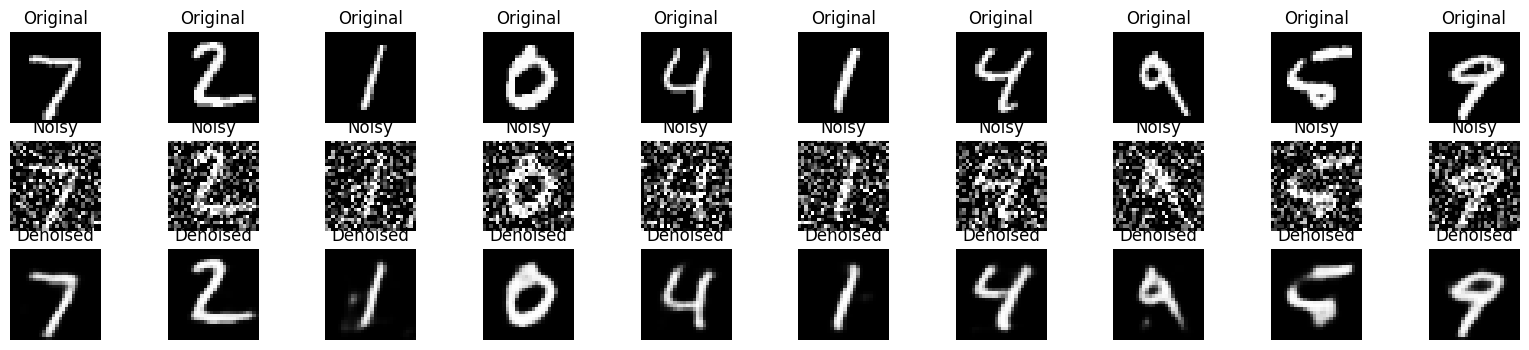

In [27]:
def plot_results(model, noisy_images, original_images, num_images=10):
    decoded_imgs = model.predict(noisy_images)
    
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        ax.set_title("Original")
        plt.gray()
        ax.axis('off')

        # Display noisy
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
        ax.set_title("Noisy")
        plt.gray()
        ax.axis('off')

        # Display denoised
        ax = plt.subplot(3, num_images, i + 1 + 2*num_images)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        ax.set_title("Denoised")
        plt.gray()
        ax.axis('off')
    plt.show()

# Display some results
plot_results(autoencoder, X_test_noisy, X_test)


In [28]:
import joblib
joblib.dump(autoencoder, 'autoencoder_conv.pkl')


['autoencoder_conv.pkl']

1875/1875 [==============================] - 11s 6ms/step


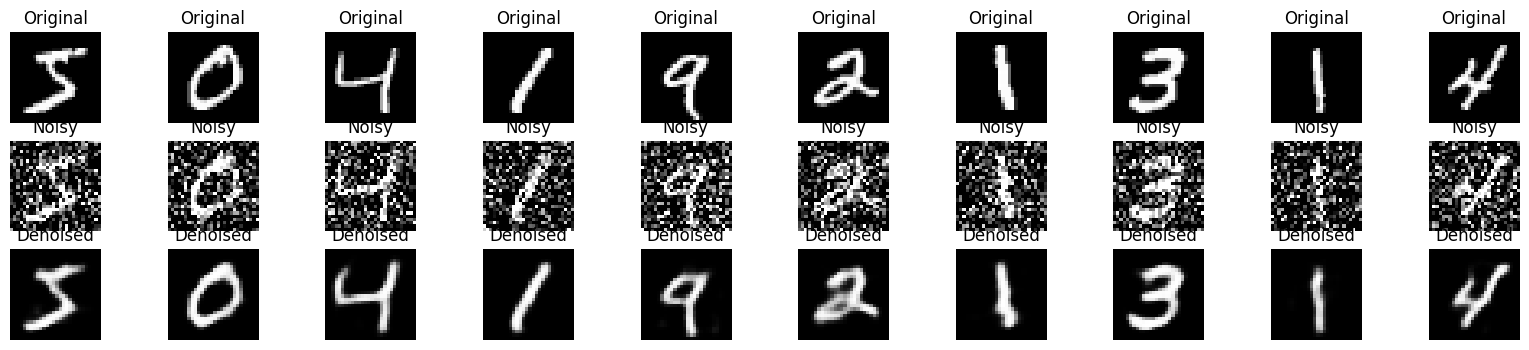

In [29]:
plot_results(autoencoder, X_train_noisy, X_train)

In [4]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

GAN=joblib.load('gan_images_mnist/GAN_gen.pkl')
autoencoder=joblib.load('autoencoder_conv.pkl')

1/1 [==============================] - 0s 91ms/step


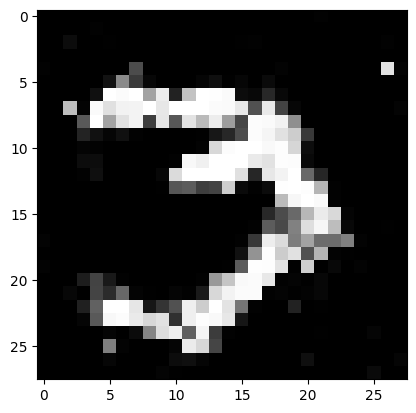

1/1 [==============================] - 0s 51ms/step


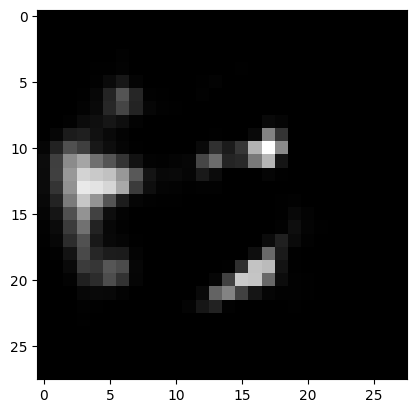

In [11]:
temp=GAN.predict(np.random.randn(1,100))
plt.imshow(temp.reshape(28,28),cmap='gray')
plt.show()
temp=temp.reshape(1,28,28,1)
outp=autoencoder.predict(temp)
plt.imshow(outp.reshape(28,28),cmap='gray')
plt.show()

1/1 [==============================] - 0s 42ms/step


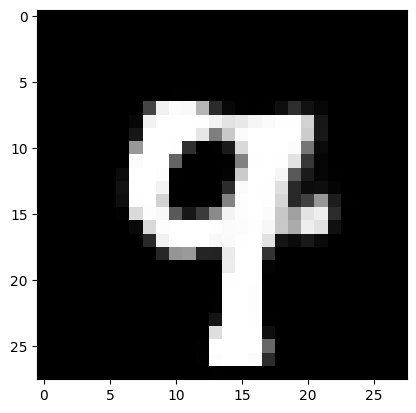